In [69]:
from sklearn.datasets import load_iris, load_boston
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df_x = df[['sepal length (cm)', 'sepal width (cm)',
            'petal length (cm)', 'petal width (cm)',]].copy()
df_x.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
df_y = df[['class']]

In [110]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.drop(['CHAS','NOX','TAX','RAD','DIS','B','CRIM'],axis = 1, inplace = True)

In [111]:
corr_df = boston_df.corr()

for i in list(corr_df):
    temp = corr_df[i][corr_df[i]>=0.65].index.tolist()
    temp.remove(i)
    print(f'"{i}" has high correlationship with : {temp}')

"ZN" has high correlationship with : []
"INDUS" has high correlationship with : []
"RM" has high correlationship with : []
"AGE" has high correlationship with : []
"PTRATIO" has high correlationship with : []
"LSTAT" has high correlationship with : []


In [112]:
def _minmax_scl(data):
    scl = MinMaxScaler()
    scl.fit(data)
    temp_df = pd.DataFrame(data = scl.transform(data), columns = list(data))
    return temp_df

def _elbow_method(k_num, data):
    distortions = []
    K = range(1,k_num)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,5))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

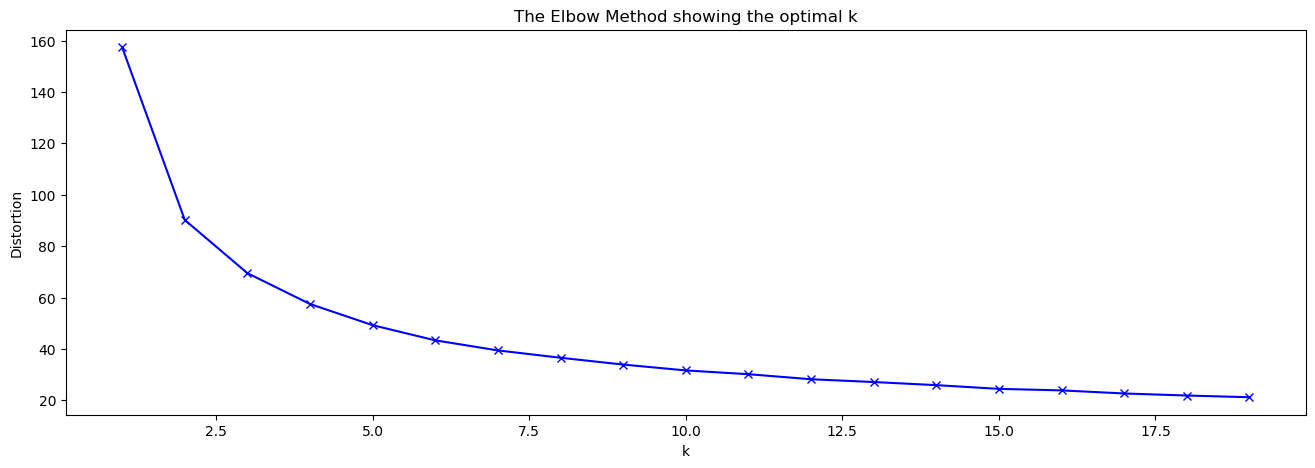

In [113]:
scl_data = _minmax_scl(boston_df)
_elbow_method(20, scl_data)

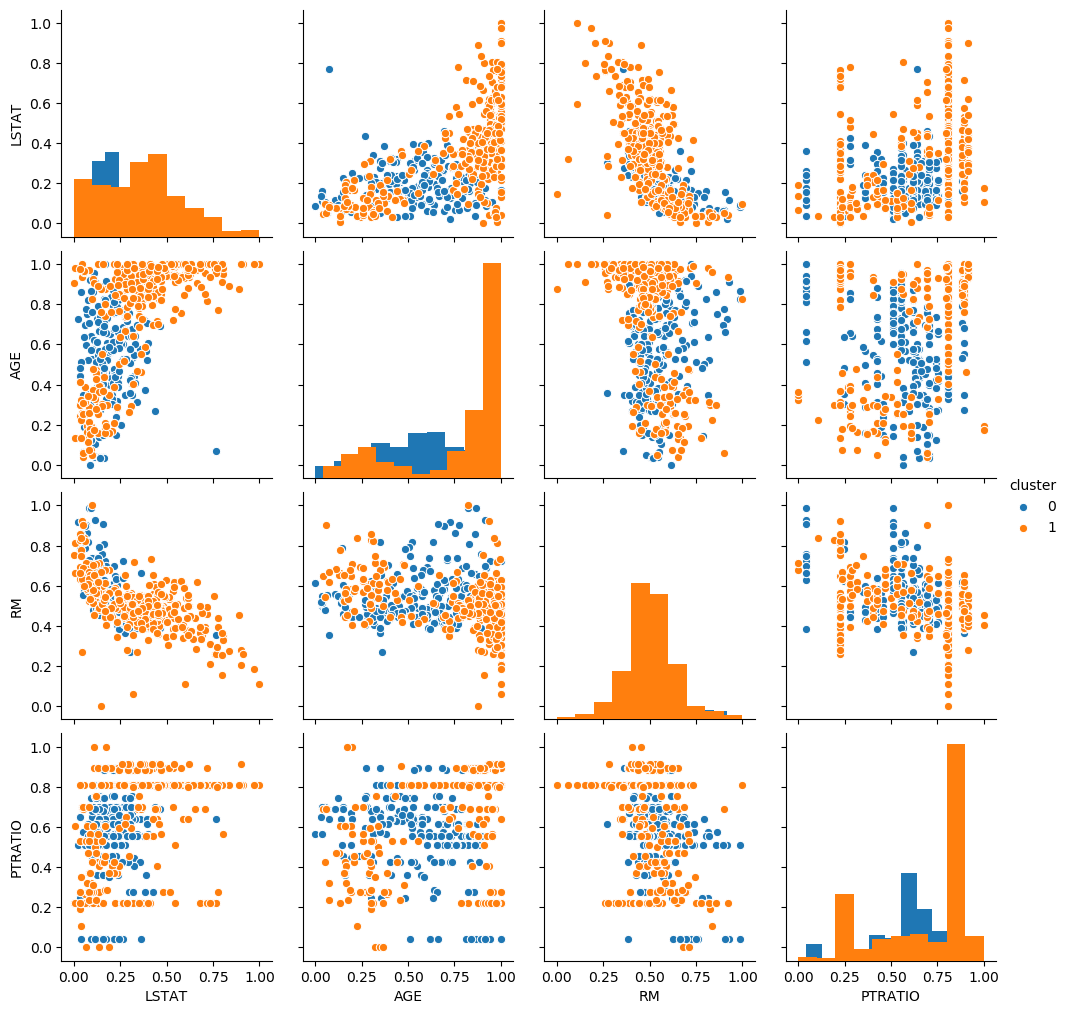

In [124]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(scl_data)
data_label = kmeans.labels_
y_kmeans = kmeans.predict(scl_data).astype('str')

scl_data['cluster'] = y_kmeans

import seaborn as sns
sns.pairplot(scl_data[['LSTAT','AGE','RM','PTRATIO','cluster']], hue = 'cluster', diag_kind="hist")

plt.show()

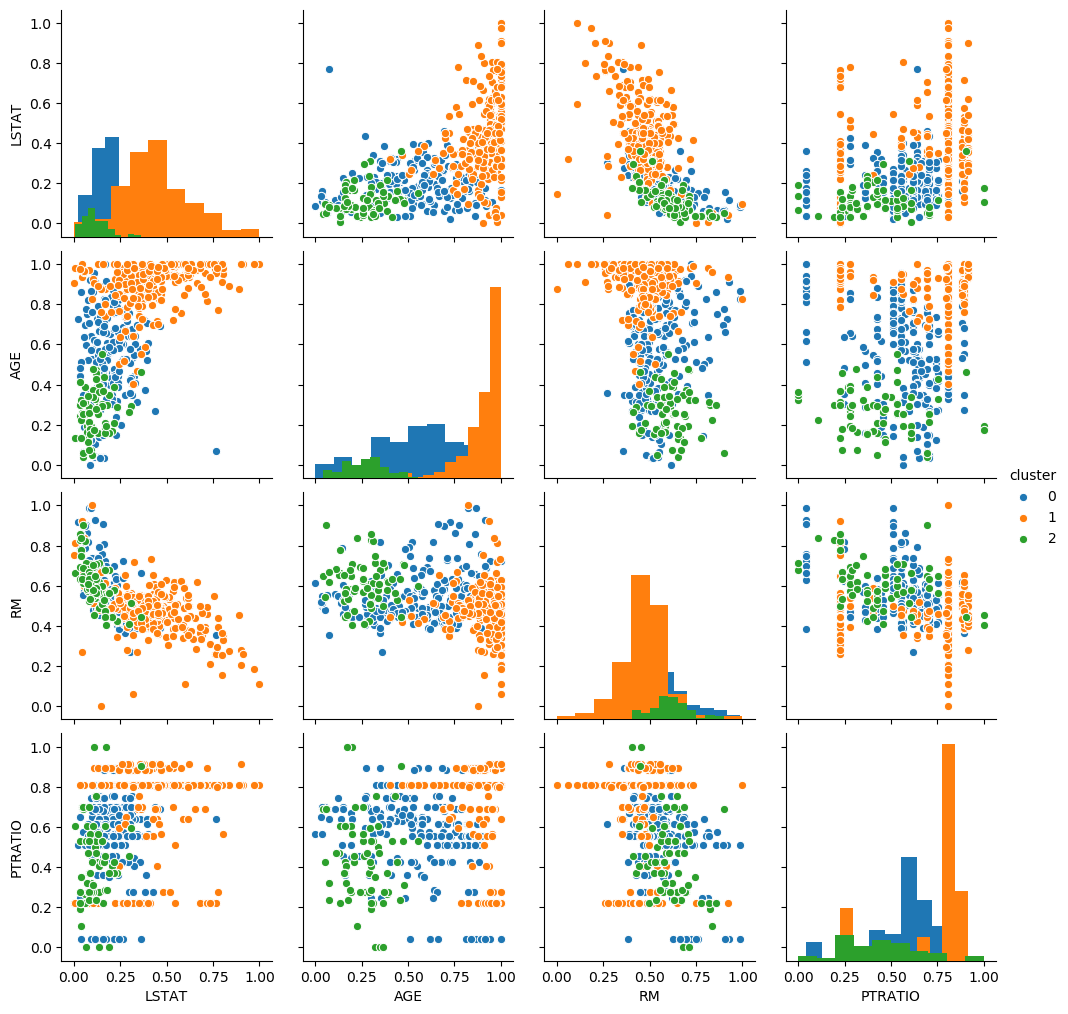

In [126]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scl_data)
data_label = kmeans.labels_
y_kmeans = kmeans.predict(scl_data).astype('str')

scl_data['cluster'] = y_kmeans

import seaborn as sns
sns.pairplot(scl_data[['LSTAT','AGE','RM','PTRATIO','cluster']], hue = 'cluster', diag_kind="hist")

plt.show()

In [127]:
feature = list(scl_data)
feature.remove('cluster')
feature

['ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']

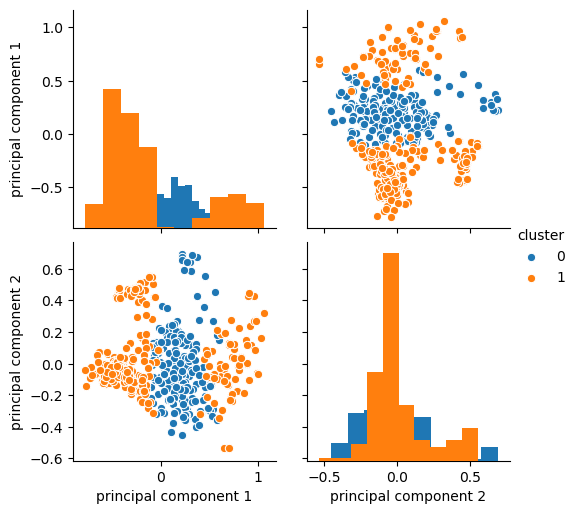

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scl_data[feature])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['cluster'] = scl_data['cluster']

sns.pairplot(principalDf, hue = 'cluster', diag_kind="hist")

plt.show()

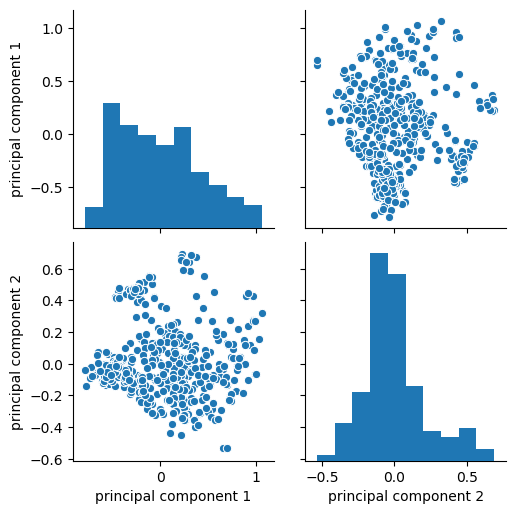

In [135]:
sns.pairplot(principalDf[['principal component 1', 'principal component 2']], diag_kind="hist")

plt.show()

In [65]:
# f, axes = plt.subplots(2, 3)
# f.set_size_inches((15, 8))

# axes[0, 0].scatter(df_x['sepal length'][df_y['class'] == 0], df_x['sepal width'][df_y['class'] == 0], color = 'r')
# axes[0, 0].scatter(df_x['sepal length'][df_y['class'] == 0], df_x['sepal width'][df_y['class'] == 1], color = 'g')
# axes[0, 0].scatter(df_x['sepal length'][df_y['class'] == 0], df_x['sepal width'][df_y['class'] == 2], color = 'b')

# axes[0, 1].scatter(df_x['sepal length'][df_y['class'] == 0], df_x['petal length'][df_y['class'] == 0], color = 'r')
# axes[0, 1].scatter(df_x['sepal length'][df_y['class'] == 0], df_x['petal length'][df_y['class'] == 1], color = 'g')
# axes[0, 1].scatter(df_x['sepal length'][df_y['class'] == 0], df_x['petal length'][df_y['class'] == 2], color = 'b')

# axes[0, 2].scatter(df_x['sepal length'][df_y['class'] == 0], df_x['petal width'][df_y['class'] == 0], color = 'r')
# axes[0, 2].scatter(df_x['sepal length'][df_y['class'] == 0], df_x['petal width'][df_y['class'] == 1], color = 'g')
# axes[0, 2].scatter(df_x['sepal length'][df_y['class'] == 0], df_x['petal width'][df_y['class'] == 2], color = 'b')

# axes[1, 0].scatter(df_x['sepal width'][df_y['class'] == 0], df_x['petal length'][df_y['class'] == 0], color = 'r')
# axes[1, 0].scatter(df_x['sepal width'][df_y['class'] == 0], df_x['petal length'][df_y['class'] == 1], color = 'g')
# axes[1, 0].scatter(df_x['sepal width'][df_y['class'] == 0], df_x['petal length'][df_y['class'] == 2], color = 'b')

# axes[1, 1].scatter(df_x['sepal width'][df_y['class'] == 0], df_x['petal width'][df_y['class'] == 0], color = 'r')
# axes[1, 1].scatter(df_x['sepal width'][df_y['class'] == 0], df_x['petal width'][df_y['class'] == 1], color = 'g')
# axes[1, 1].scatter(df_x['sepal width'][df_y['class'] == 0], df_x['petal width'][df_y['class'] == 2], color = 'b')

# axes[1, 2].scatter(df_x['petal length'][df_y['class'] == 0], df_x['petal width'][df_y['class'] == 0], color = 'r')
# axes[1, 2].scatter(df_x['petal length'][df_y['class'] == 0], df_x['petal width'][df_y['class'] == 1], color = 'g')
# axes[1, 2].scatter(df_x['petal length'][df_y['class'] == 0], df_x['petal width'][df_y['class'] == 2], color = 'b')


# plt.show()

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

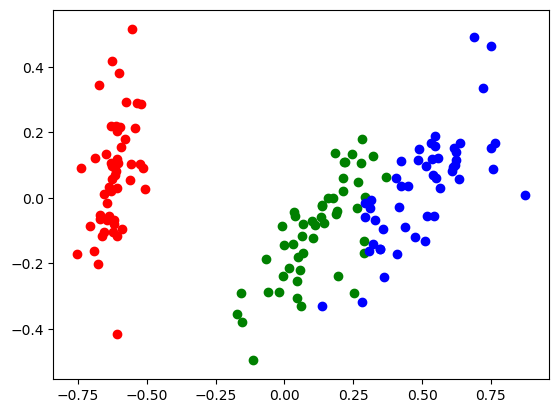

In [15]:
plt.scatter(principalDf['principal component 1'][df_y['class'] ==0], 
            principalDf['principal component 2'][df_y['class'] ==0],
            color = 'r')
plt.scatter(principalDf['principal component 1'][df_y['class'] ==1], 
            principalDf['principal component 2'][df_y['class'] ==1],
            color = 'g')
plt.scatter(principalDf['principal component 1'][df_y['class'] ==2], 
            principalDf['principal component 2'][df_y['class'] ==2],
            color = 'b')

plt.show()